# Olympics Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('athlete_events.csv')
df_region = pd.read_csv('noc_regions.csv')

In [3]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [4]:
df_region.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [5]:
df.shape

(271116, 15)

In [6]:
# we only need the analysis of the Summer Olympics
df = df[df['Season'] == 'Summer']

In [7]:
df.shape

(222552, 15)

Now from the df_region dataset we want the region , for that we will use the NOC in the df_region and get the region and notes as NOC is present in both of the Datasets

In [8]:
df = df.merge(df_region , on='NOC' , how = 'left')

In [9]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  
0   Basketball Men's Basketball   NaN        China   NaN  
1  Judo Men's Extra-Lightweight   NaN        China   NaN  
2       Football Men's Football   NaN      Denmark   NaN  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN

### Medal Tally

In [10]:
# All the countries which have participated 
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
# checking missing values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
# Checking Duplicates
df.duplicated().sum()

1385

In [13]:
# Drop the Duplicates 
df.drop_duplicates(inplace=True)

In [14]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [15]:
pd.get_dummies(df['Medal'])

Bronze   Gold  Silver
0        False  False   False
1        False  False   False
2        False  False   False
3        False   True   False
4        False  False   False
...        ...    ...     ...
222547   False  False   False
222548   False  False   False
222549   False  False   False
222550   False  False   False
222551   False  False   False

[221167 rows x 3 columns]

So in the get_dummies for the nan values all the 3 rows will be 0

In [16]:
# Concatinating the Dummies with the Original Dataframe DF
df = pd.concat([df , pd.get_dummies(df['Medal'])] ,axis = 1)

In [17]:
# Getting the vaules of Medals on the basis of contry code 
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold' , ascending=False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

Now above Dataframe has a Problem , that is for a same team which has won the Gold medal it is calculating the medal not for the team but for all the members.. For example : If a team has won Gold medal in Hockey then it should be 1 medal but this is counting 11 medal as it has 11 team members 

So Inorder to correct this we need to drop the Duplicates on the basis of Team	NOC	Games Year City	Sport Event	Medal

In [18]:
medal_tally = df

In [19]:
medal_tally

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [20]:
print(medal_tally.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')


In [21]:
medal_tally = df.drop_duplicates(subset=(['Team','NOC','Games','Year','City','Sport','Event','Medal']))

In [22]:
medal_tally

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222528       Russia   NaN   False  False    True  
222530       Russia   NaN    True  False   False  
222536       Poland   NaN   False  False   False  
222537       Poland   NaN   False  False   False  
222541       Greece   NaN   False  False   False  

[105636 rows x 20 columns]

In [23]:
# Now again Groupby with the Noc and the Medals
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold' , ascending=False).reset_index()

In [24]:
medal_tally

region  Gold  Silver  Bronze
0              USA  1035     802     708
1           Russia   592     498     487
2          Germany   444     457     491
3               UK   278     317     300
4           France   234     256     287
..             ...   ...     ...     ...
200        Lesotho     0       0       0
201        Albania     0       0       0
202          Libya     0       0       0
203  Liechtenstein     0       0       0
204        Liberia     0       0       0

[205 rows x 4 columns]

In [25]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [26]:
medal_tally

region  Gold  Silver  Bronze  Total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [27]:
# Checking the Medal Tally for INDIA
medal_tally[medal_tally['region'] == 'India']

region  Gold  Silver  Bronze  Total
46  India     9       7      12     28

In [28]:
years = df['Year'].unique().tolist()

In [29]:
years.sort()

In [30]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [31]:
years.insert(0,'Overall')

In [32]:
# country = df['region'].unique().tolist()

In [33]:
country = np.unique(df['region'].dropna().values).tolist()

In [34]:
country.sort()

In [35]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [36]:
country.insert(0,'Overall')

In [37]:
medal_df = df.drop_duplicates(subset=(['Team','NOC','Games','Year','City','Sport','Event','Medal']))

In [38]:
def fetch_medal_tally(df , years , country):
    medal_df = df.drop_duplicates(subset=(['Team','NOC','Games','Year','City','Sport','Event','Medal']))
    flag = 0
    if years == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if years == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if years != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == years]
    if years != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == years) & (medal_df['region'] == country)]  
    
    if flag == 1:
        X = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        X = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold' , ascending=False).reset_index()
    
    X['Total'] = X['Gold'] + X['Silver'] + X['Bronze']
    print(X)

In [39]:
# fetch_medal_tally(years= 'Overall',country= 'Overall')
# fetch_medal_tally(years= 'Overall',country= 'India')
# fetch_medal_tally(years= 2016,country= 'Overall')
fetch_medal_tally(df , years= 2000 , country= 'Overall')

                          region  Gold  Silver  Bronze  Total
0                            USA    36      24      31     91
1                         Russia    32      28      29     89
2                          China    28      16      14     58
3                      Australia    16      25      17     58
4                         France    13      14      11     38
..                           ...   ...     ...     ...    ...
193                      Iceland     0       0       1      1
194                        India     0       0       1      1
195  Individual Olympic Athletes     0       0       0      0
196                         Iraq     0       0       0      0
197                     Zimbabwe     0       0       0      0

[198 rows x 5 columns]


### Overall Olympic Analysis

1. No of editions
2. No of cities 
3. No of events/sports
4. No of Atheletes
5. Participating nations

In [40]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [41]:
# lets find the kitne baar olympics hua hai
df['Year'].unique().shape[0] - 1

28

In [42]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [43]:
df['Sport'].unique().shape[0]

52

In [44]:
df['Event'].unique().shape[0]

651

In [45]:
df['Name'].unique().shape[0]

116122

In [46]:
# Getting over the years how many nations participated in the Olympics
nations_over_time =  df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_index(ascending=False)

In [47]:
nations_over_time

Year  count
28  1896     12
27  1904     14
26  1906     20
25  1908     22
24  1912     29
23  1920     29
22  1900     31
21  1924     45
20  1928     46
19  1932     47
18  1936     49
17  1948     59
16  1952     67
15  1956     71
14  1980     80
13  1960     83
12  1976     91
11  1964     93
10  1968    111
9   1972    120
8   1984    139
7   1988    156
6   1992    168
5   1996    196
4   2000    199
3   2004    200
2   2008    202
1   2012    203
0   2016    204

In [48]:
import matplotlib.pyplot as plt

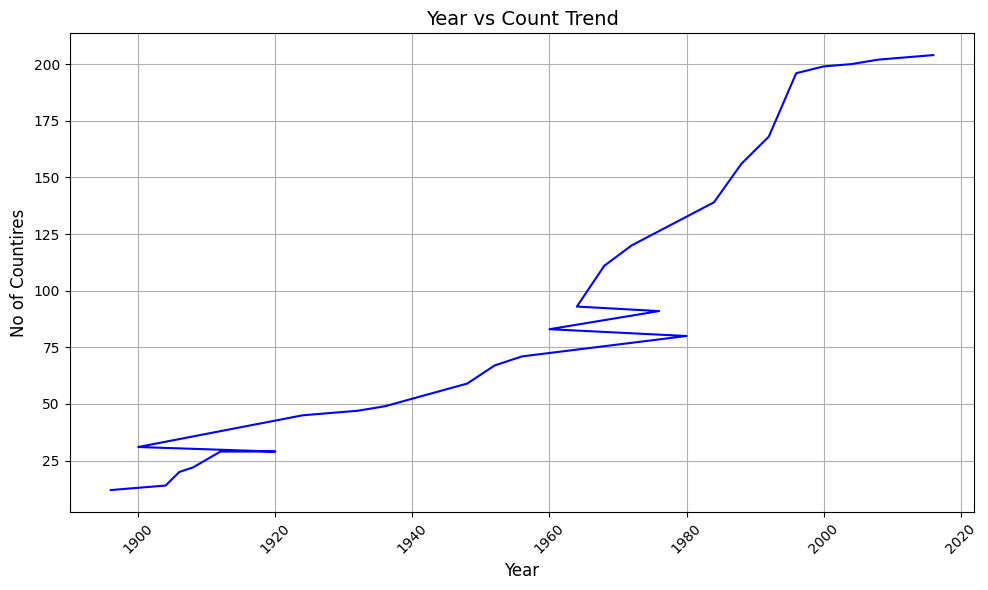

In [49]:
# Create a line plot
plt.figure(figsize=(10, 6))
years = nations_over_time['Year']
counts = nations_over_time['count']
plt.plot(years, counts, marker='', linestyle='-', color='b')

# Adding labels and title
plt.title('Year vs Count Trend', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('No of Countires', fontsize=12)

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()
plt.show()

In [50]:
# Now calcualting that over the years no of events kitne hue
events_over_time =  df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_index(ascending=False)

In [51]:
events_over_time

Year  count
28  1896     43
27  1906     74
26  1900     90
25  1904     95
24  1912    107
23  1908    109
22  1928    122
21  1932    131
20  1924    131
19  1952    149
18  1936    150
17  1960    150
16  1956    151
15  1948    153
14  1920    158
13  1964    163
12  1968    172
11  1972    193
10  1976    198
9   1980    203
8   1984    221
7   1988    237
6   1992    257
5   1996    271
4   2000    300
3   2004    301
2   2012    302
1   2008    302
0   2016    306

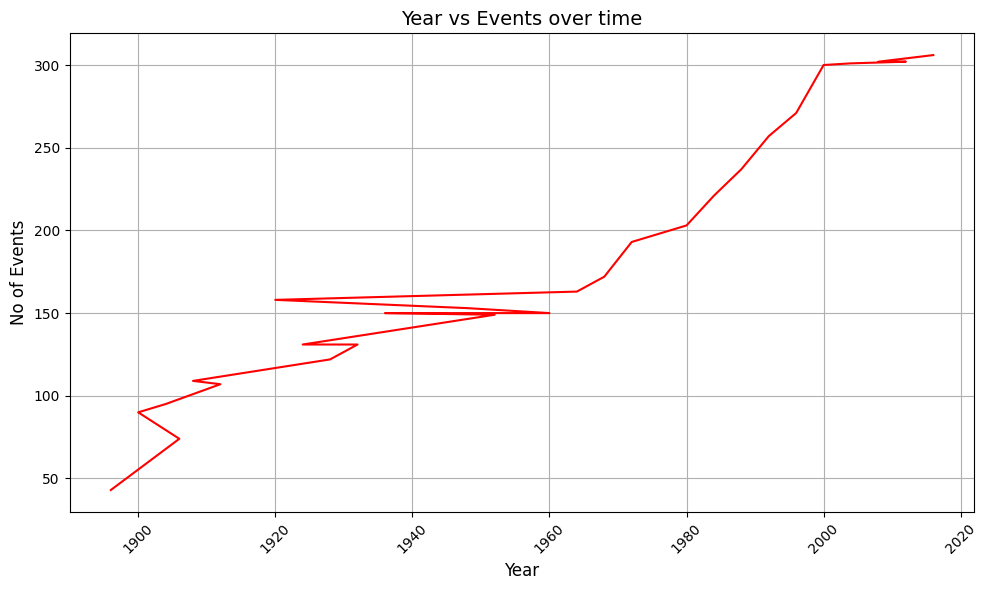

In [52]:
#  Create a line plot
plt.figure(figsize=(10, 6))
years = events_over_time['Year']
events = events_over_time['count']
plt.plot(years, events, marker='', linestyle='-', color='r')
# Adding labels and title
plt.title('Year vs Events over time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('No of Events', fontsize=12)

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()
plt.show()

In [53]:
# Now calcualting that over the years no of Athelets kitne aae 
atheletes_over_time =  df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_index(ascending=False)

In [54]:
atheletes_over_time

Year  count
28  1896    176
27  1904    650
26  1906    841
25  1900   1220
24  1932   1922
23  1908   2024
22  1912   2409
21  1920   2675
20  1928   3246
19  1924   3256
18  1956   3346
17  1948   4402
16  1936   4482
15  1952   4931
14  1964   5134
13  1980   5252
12  1960   5348
11  1968   5552
10  1976   6070
9   1984   6791
8   1972   7105
7   1988   8443
6   1992   9380
5   1996  10324
4   2012  10502
3   2004  10537
2   2000  10639
1   2008  10880
0   2016  11174

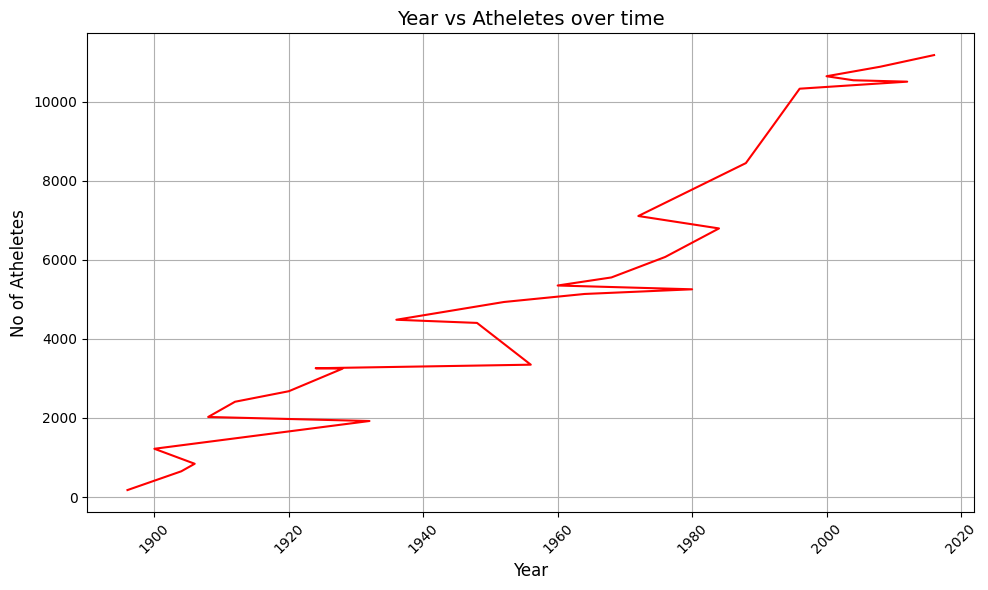

In [55]:
#  Create a line plot
plt.figure(figsize=(10, 6))
years = atheletes_over_time['Year']
atheletes = atheletes_over_time['count']
plt.plot(years, atheletes, marker='', linestyle='-', color='r')
# Adding labels and title
plt.title('Year vs Atheletes over time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('No of Atheletes', fontsize=12)

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()
plt.show()

In [56]:
# Trying to find out ki over the yaer har sports me kitne events hue
# 1. Drop Duplicates on 3 features
x = df.drop_duplicates(['Year' , 'Sport' , 'Event'])
# 2. Making a Pivot table
x_pivot_table = x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int)
print(x_pivot_table)

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5 

<Axes: xlabel='Year', ylabel='Sport'>

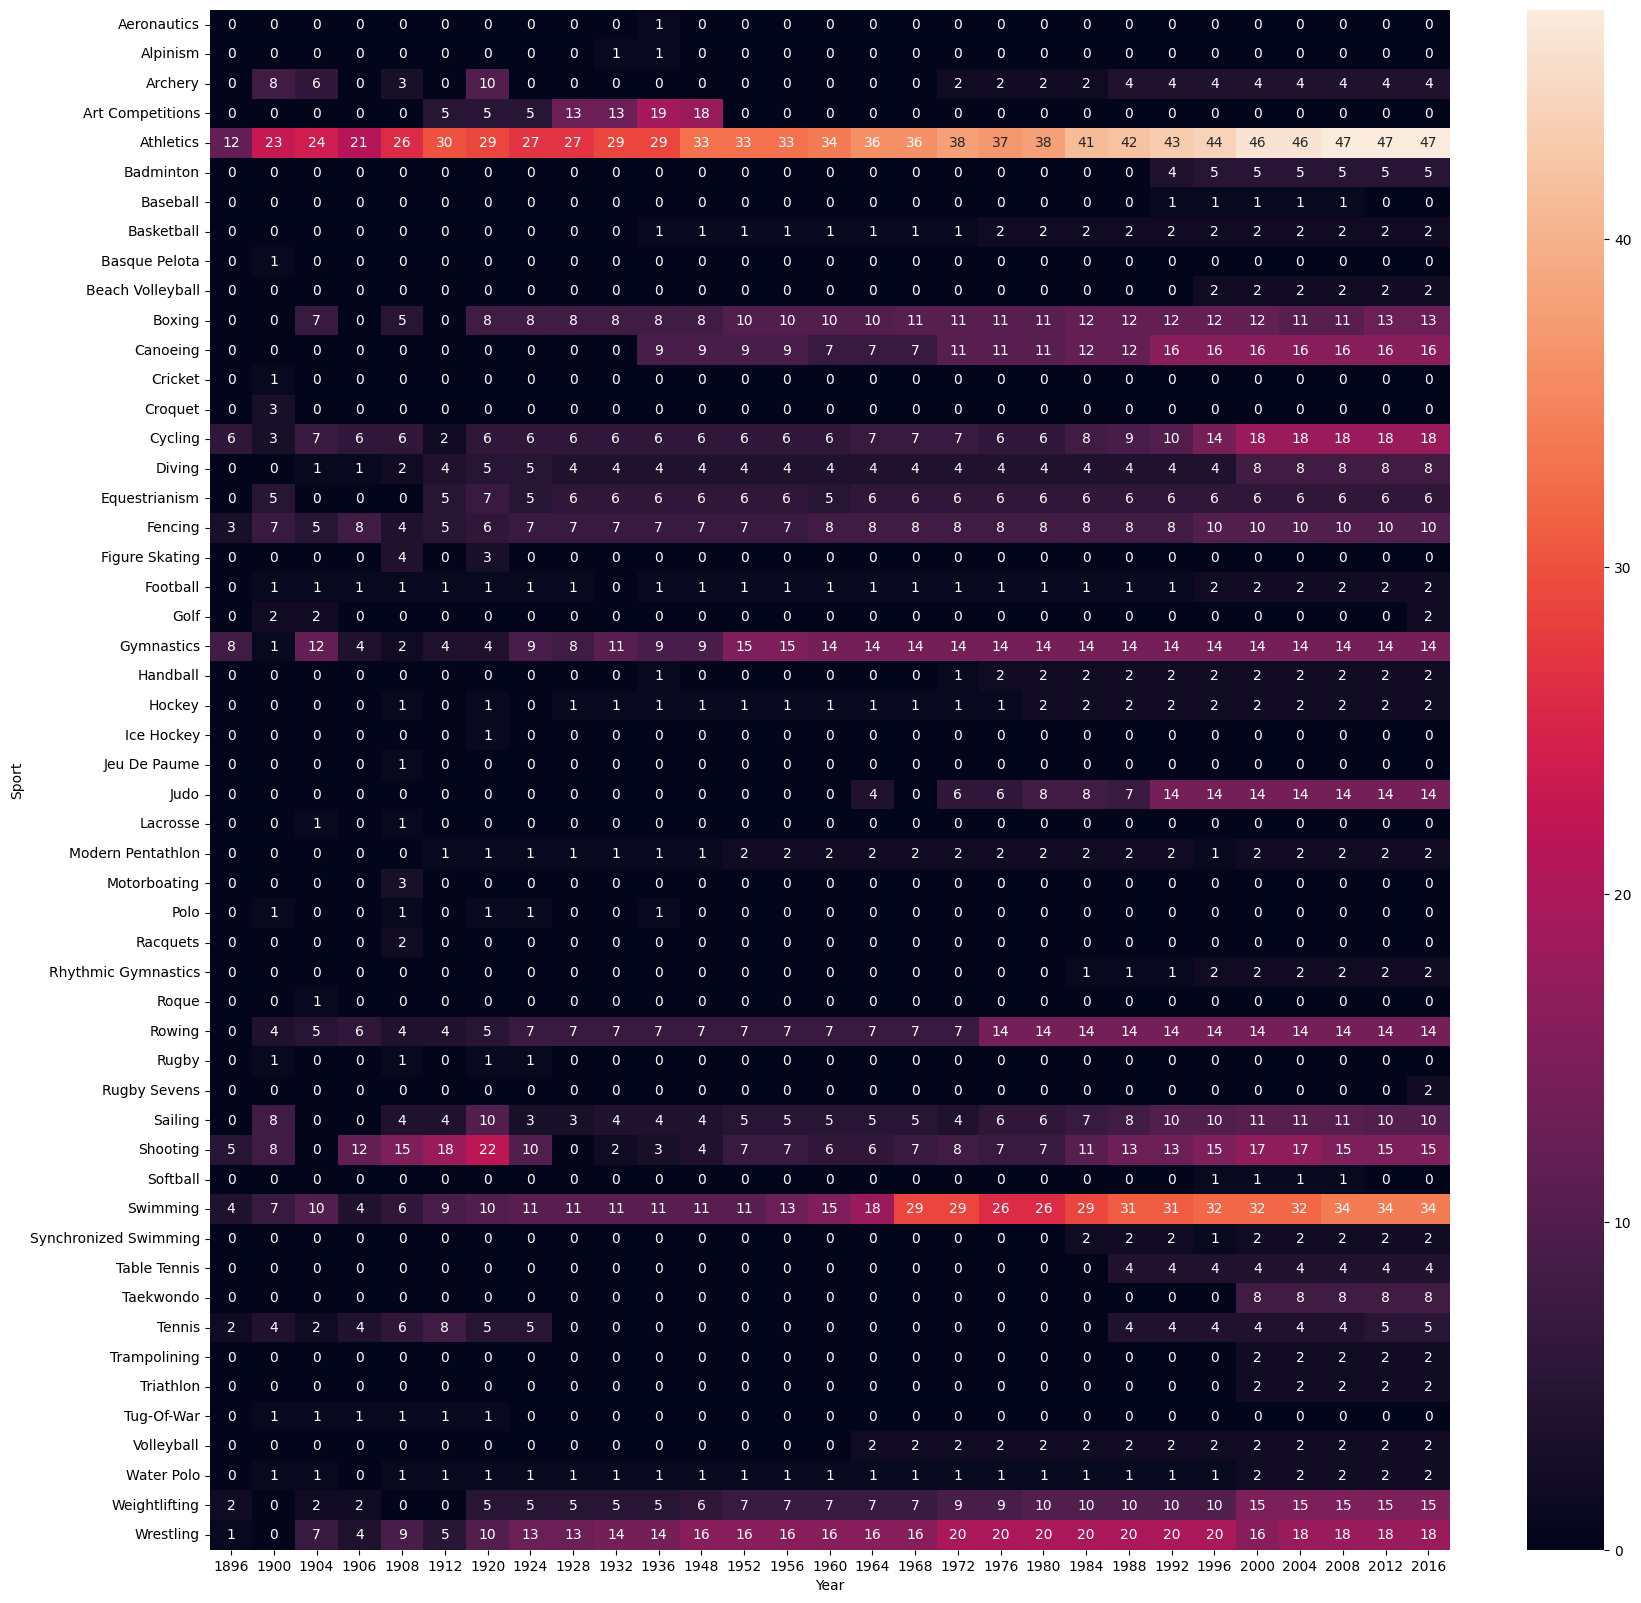

In [57]:
# Plot the above pivot table using the heatmap
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(x_pivot_table,annot=True)

In [58]:
# Creating a function which will tell you the most successful athelete in then respective sport
def most_successful(df ,sport):
    # Now we dont need a Athelete who doesn't have any medal so 
    temp_df = df.dropna(subset='Medal')
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    temp_df = temp_df['Name'].value_counts().reset_index().head(15).merge(df , left_on = 'Name' , right_on = 'Name' , how = 'left')[['Name','count','region','Sport']].drop_duplicates('Name')
    temp_df = temp_df.rename(columns={'count': 'Medals'})
    temp_df = temp_df.rename(columns={'region': 'Country'})
    return temp_df

In [59]:
most_successful(df , 'Overall')

Name  Medals  Country  \
0                            Michael Fred Phelps, II      28      USA   
30                Larysa Semenivna Latynina (Diriy-)      18   Russia   
49                      Nikolay Yefimovich Andrianov      15   Russia   
73                       Borys Anfiyanovych Shakhlin      13   Russia   
97                                       Takashi Ono      13    Japan   
130                              Edoardo Mangiarotti      13    Italy   
144             Dara Grace Torres (-Hoffman, -Minas)      12      USA   
157                          Aleksey Yuryevich Nemov      12   Russia   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12      USA   
195                           Birgit Fischer-Schmidt      12  Germany   
208                               Ryan Steven Lochte      12      USA   
222                             Paavo Johannes Nurmi      12  Finland   
234                                       Sawao Kato      12    Japan   
258                    Natalie Anne Coughlin (-Hall)      12      USA   
270                   Matthew Nicholas "Matt" Biondi      11      USA   

          Sport  
0      Swimming  
30   Gymnastics  
49   Gymnastics  
73   Gymnastics  
97   Gymnastics  
130     Fencing  
144    Swimming  
157  Gymnastics  
178    Swimming  
195    Canoeing  
208    Swimming  
222   Athletics  
234  Gymnastics  
258    Swimming  
270    Swimming

### Country-Wise Analysis

1. Countrywise Medal tally per year
2. Which country is good at which sport
3. Most successful Atheletes of that country

In [60]:
temp_df = df.dropna(subset=['Medal'])

In [61]:
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'] , inplace=True) # this is telling that if a team has won a medal then count only one not 11 so drop all the duplicates with respect to 'Team','NOC','Games','Year','City','Sport','Event','Medal' 

C:\Users\radhe\AppData\Local\Temp\ipykernel_2736\3569072212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'] , inplace=True) # this is telling that if a team has won a medal then count only one not 11 so drop all the duplicates with respect to 'Team','NOC','Games','Year','City','Sport','Event','Medal'


In [62]:
temp_df

ID                                 Name Sex   Age  Height  Weight  \
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
12          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
13          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
15          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
16          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
...        ...                                  ...  ..   ...     ...     ...   
222486  135521                        Anton Zwerina   M  23.0     NaN    66.0   
222508  135535            Claudia Antoinette Zwiers   F  22.0   181.0    78.0   
222526  135553  Galina Ivanovna Zybina (-Fyodorova)   F  21.0   168.0    80.0   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   

                  Team  NOC        Games  Year  Season       City  \
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
12             Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
13             Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
15             Finland  FIN  1948 Summer  1948  Summer     London   
16             Finland  FIN  1948 Summer  1948  Summer     London   
...                ...  ...          ...   ...     ...        ...   
222486         Austria  AUT  1924 Summer  1924  Summer      Paris   
222508     Netherlands  NED  1996 Summer  1996  Summer    Atlanta   
222526    Soviet Union  URS  1952 Summer  1952  Summer   Helsinki   
222528    Soviet Union  URS  1956 Summer  1956  Summer  Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer      Tokyo   

                Sport                                   Event   Medal  \
3          Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
12           Swimming  Swimming Men's 200 metres Breaststroke  Bronze   
13           Swimming  Swimming Men's 400 metres Breaststroke  Bronze   
15         Gymnastics  Gymnastics Men's Individual All-Around  Bronze   
16         Gymnastics        Gymnastics Men's Team All-Around    Gold   
...               ...                                     ...     ...   
222486  Weightlifting         Weightlifting Men's Lightweight  Silver   
222508           Judo               Judo Women's Middleweight  Bronze   
222526      Athletics              Athletics Women's Shot Put    Gold   
222528      Athletics              Athletics Women's Shot Put  Silver   
222530      Athletics              Athletics Women's Shot Put  Bronze   

             region notes  Bronze   Gold  Silver  
3           Denmark   NaN   False   True   False  
12          Finland   NaN    True  False   False  
13          Finland   NaN    True  False   False  
15          Finland   NaN    True  False   False  
16          Finland   NaN   False   True   False  
...             ...   ...     ...    ...     ...  
222486      Austria   NaN   False  False    True  
222508  Netherlands   NaN    True  False   False  
222526       Russia   NaN   False   True   False  
222528       Russia   NaN   False  False    True  
222530       Russia   NaN    True  False   False  

[16074 rows x 20 columns]

In [63]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()
final_df

Year  Medal
0   1896     19
1   1900     54
2   1904    231
3   1906     23
4   1908     46
5   1912     63
6   1920     95
7   1924     99
8   1928     56
9   1932    110
10  1936     57
11  1948     84
12  1952     76
13  1956     74
14  1960     71
15  1964     90
16  1968    107
17  1972     94
18  1976     94
19  1984    173
20  1988     94
21  1992    108
22  1996    101
23  2000     91
24  2004    101
25  2008    110
26  2012    103
27  2016    121

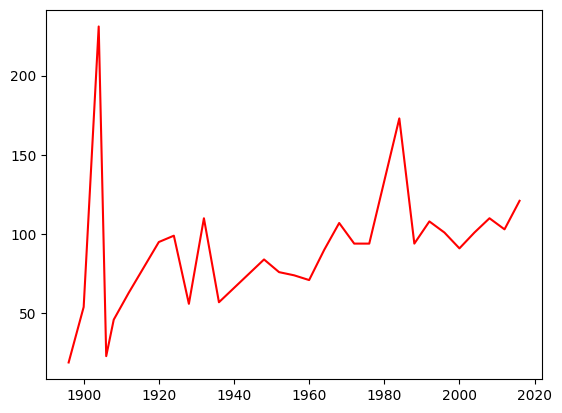

In [64]:
years = final_df['Year']
medals = final_df['Medal']
plt.plot(years, medals, marker='', linestyle='-', color='r')

In [65]:
# Trying to find out which country is good in which sports
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'] , inplace=True) # this is telling that if a team has won a medal then count only one not 11 so drop all the duplicates with respect to 'Team','NOC','Games','Year','City','Sport','Event','Medal' 

C:\Users\radhe\AppData\Local\Temp\ipykernel_2736\3043723624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'] , inplace=True) # this is telling that if a team has won a medal then count only one not 11 so drop all the duplicates with respect to 'Team','NOC','Games','Year','City','Sport','Event','Medal'


In [66]:
new_df = temp_df[temp_df['region'] == 'UK']

In [67]:
pivot_table = new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype(int)
print(x_pivot_table)

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5 

<Axes: xlabel='Year', ylabel='Sport'>

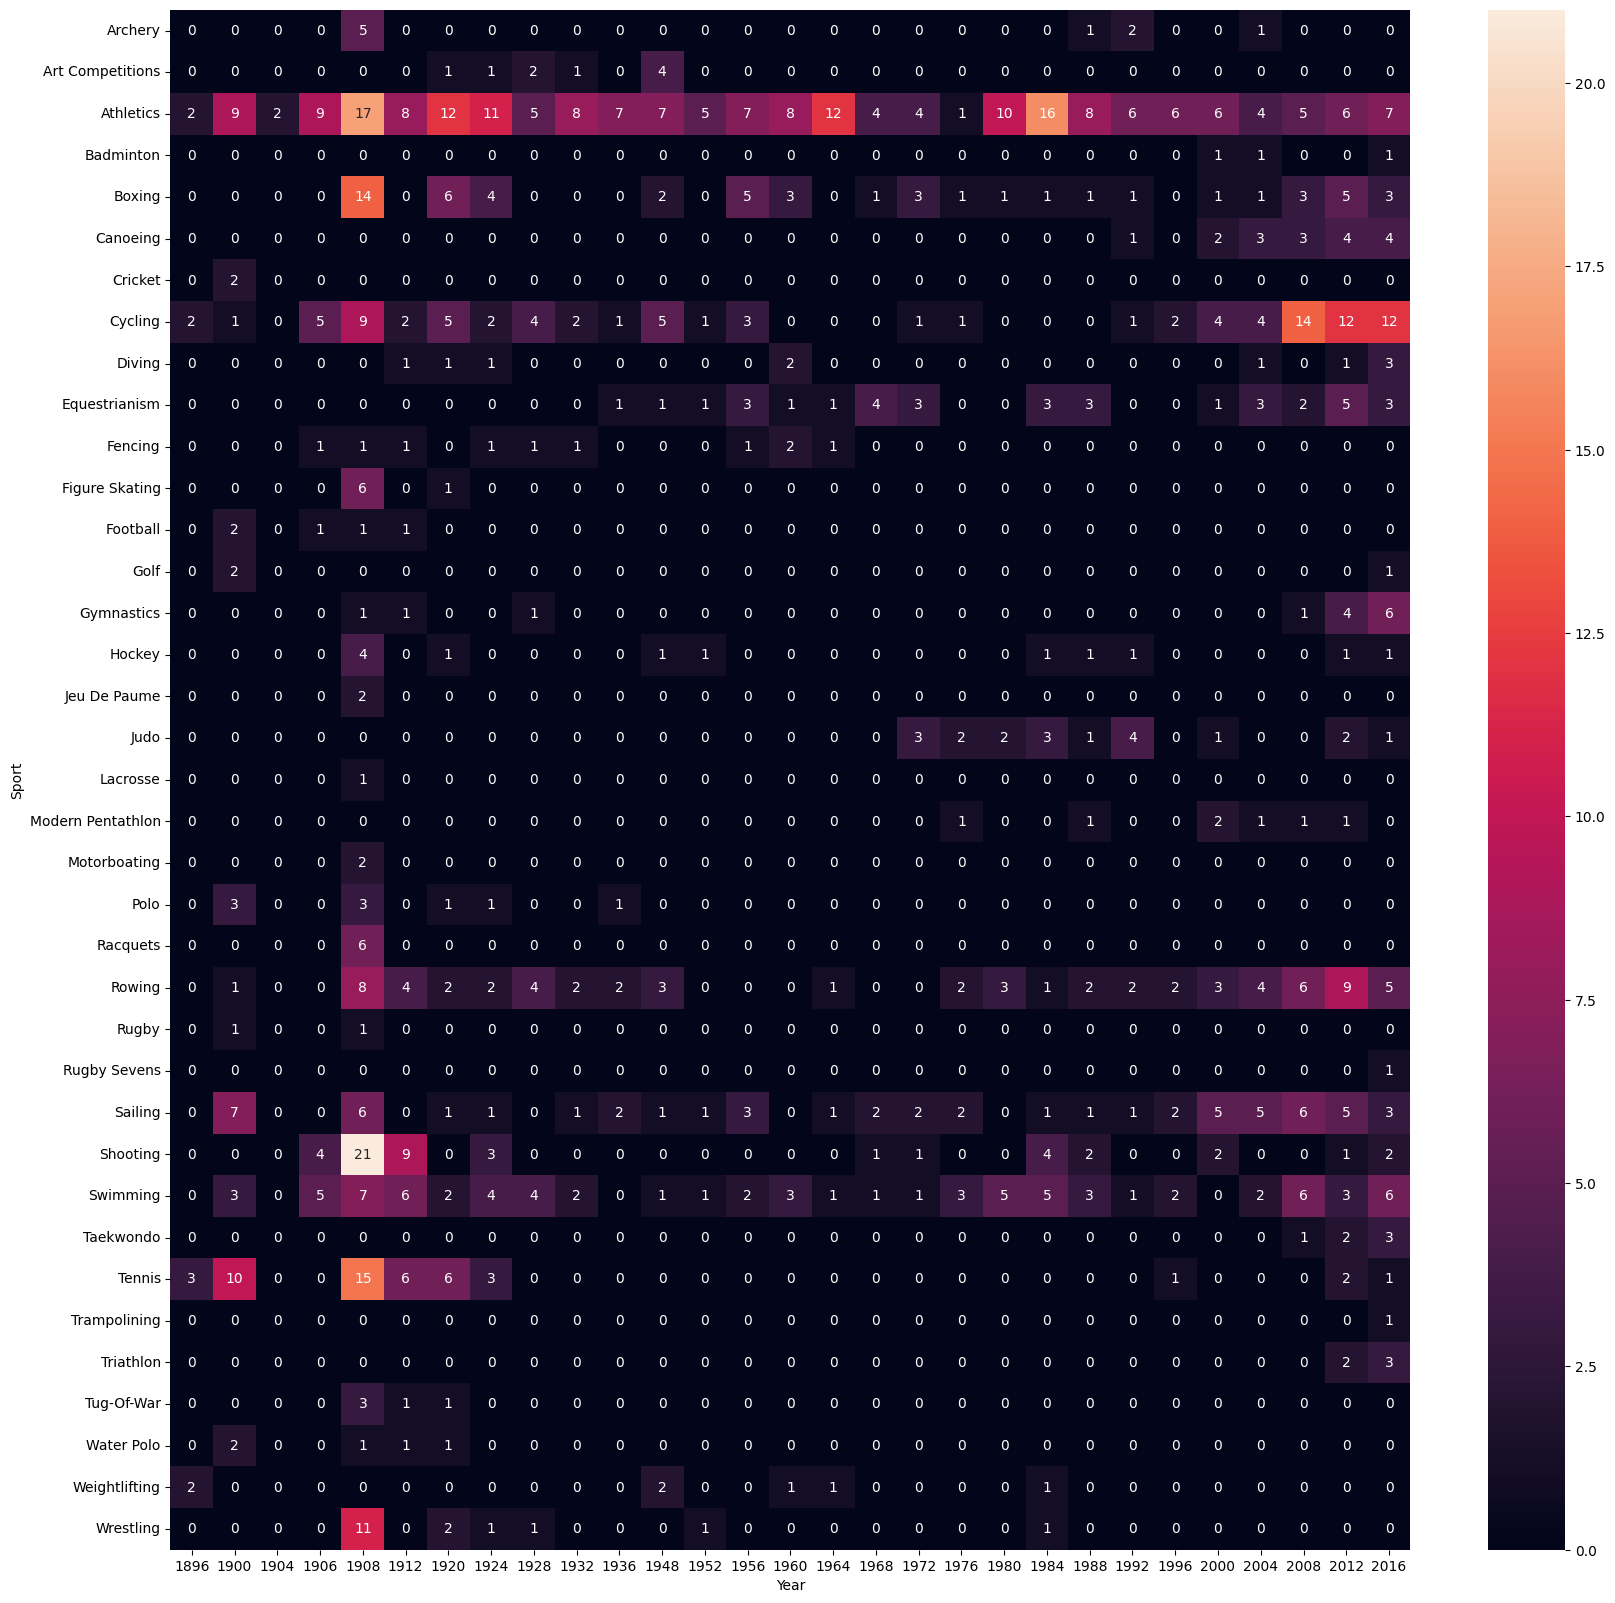

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(pivot_table,annot=True)

In [69]:
# Creating a function which will tell you the most successful athelete in then respective sport
def most_successful_athelete_country(df , country):
    # Now we dont need a Athelete who doesn't have any medal so 
    temp_df = df.dropna(subset='Medal')
    temp_df = temp_df[temp_df['region'] == country]
    temp_df = temp_df['Name'].value_counts().reset_index().head(10).merge(df , left_on = 'Name' , right_on = 'Name' , how = 'left')[['Name','count','Sport']].drop_duplicates('Name')
    temp_df = temp_df.rename(columns={'count': 'Medals'})
    return temp_df

In [70]:
most_successful_athelete_country(df , 'Jamaica')

Name  Medals      Sport
0          Merlene Joyce Ottey-Page       9  Athletics
19  Veronica Angella Campbell-Brown       8  Athletics
30               Usain St. Leo Bolt       8  Athletics
40          Shelly-Ann Fraser-Pryce       6  Athletics
47    Donald O'Reilly "Don" Quarrie       4  Athletics
56    Herbert Henry "Herb" McKenley       4  Athletics
62              Arthur Stanley Wint       4  Athletics
68   Novlene Hilaire Williams-Mills       4  Athletics
75                      Yohan Blake       4  Athletics
81         Sherone Anmarica Simpson       3  Athletics

### Athelete Wise Analysis

In [71]:
new_df_athe = df.drop_duplicates(subset=['Name','region'])

In [72]:
new_df_athe

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event   Medal  \
0       Basketball             Basketball Men's Basketball     NaN   
1             Judo            Judo Men's Extra-Lightweight     NaN   
2         Football                 Football Men's Football     NaN   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics            Athletics Women's 100 metres     NaN   
...            ...                                     ...     ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   
222546      Hockey                     Hockey Men's Hockey     NaN   
222548    Football                 Football Men's Football     NaN   
222549      Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
222551  Basketball           Basketball Women's Basketball     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222544       Russia   NaN    True  False   False  
222546    Argentina   NaN   False  False   False  
222548          USA   NaN   False  False   False  
222549       Russia   NaN   False  False   False  
222551      Belarus   NaN   False  False   False  

[116885 rows x 20 columns]

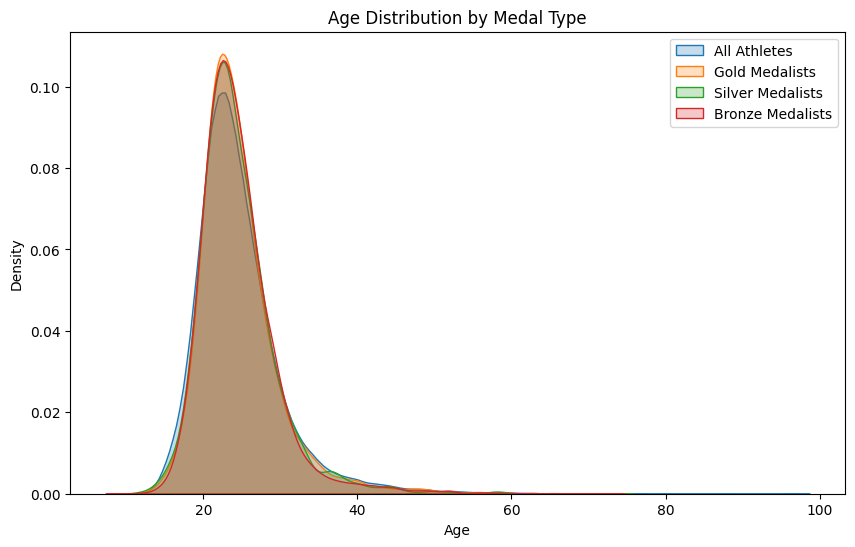

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NaN values from each group
x1 = new_df_athe['Age'].dropna()
x2 = new_df_athe[new_df_athe['Medal'] == 'Gold']['Age'].dropna()
x3 = new_df_athe[new_df_athe['Medal'] == 'Silver']['Age'].dropna()
x4 = new_df_athe[new_df_athe['Medal'] == 'Bronze']['Age'].dropna()

# Create a KDE plot for each group
plt.figure(figsize=(10, 6))
sns.kdeplot(x1, label='All Athletes', fill=True)
sns.kdeplot(x2, label='Gold Medalists', fill=True)
sns.kdeplot(x3, label='Silver Medalists', fill=True)
sns.kdeplot(x4, label='Bronze Medalists', fill=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Medal Type')

# Add a legend to differentiate the groups
plt.legend()

# Show the plot
plt.show()


In [74]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [75]:
famous_sports

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Polo',
 'Ice Hockey']

In [76]:
x = []
name = []
for sport in famous_sports:
        temp_df =  new_df_athe[new_df_athe['Sport'] == sport]
        x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
        name.append(sport)

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# Create a figure and axis for the plots
fig, ax = plt.subplots(figsize=(100, 60))

# Plot KDE for each sport
for ages, sport in zip(x, name):
    sns.kdeplot(ages, label=sport, ax=ax)

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.set_title('Distribution of Ages for Gold Medalists by Sport')

# Add a legend to differentiate sports
ax.legend(title='Sport')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot in Streamlit
# st.pyplot(fig)
plt.show(fig)


In [78]:
# Plotting the height and weights of the Atheletes wrt to the Medals
# new_df_athe['Medal'].fillna('No Medal')

2024-09-18 01:41:52.170 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 01:41:52.493 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 01:41:52.906 
  command:

    streamlit run c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-18 01:41:52.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

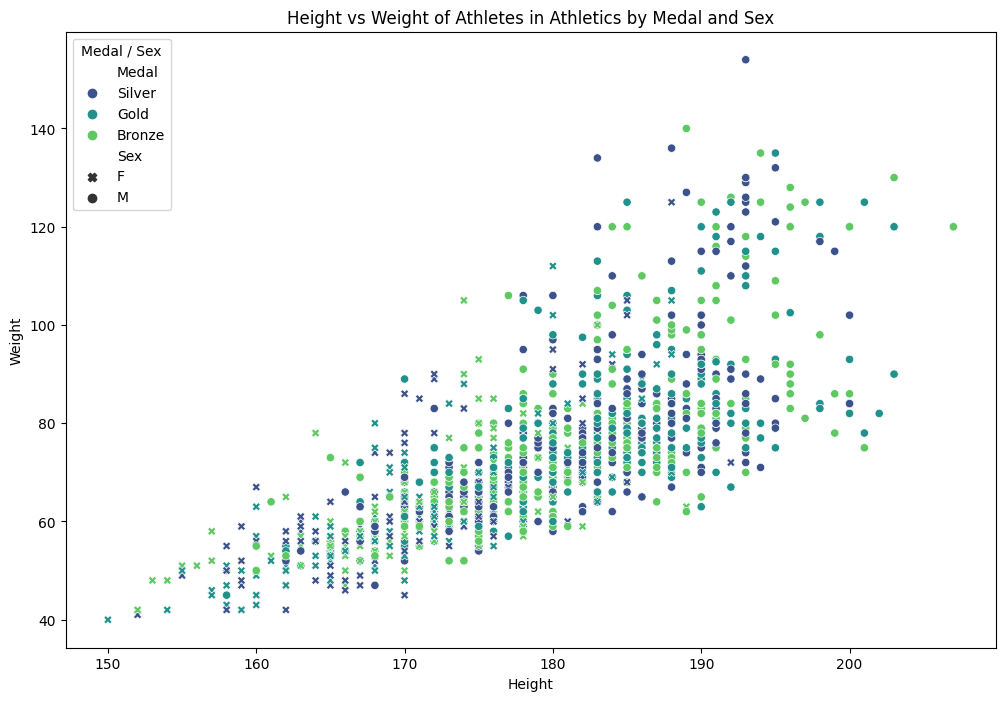

In [79]:
# Filter the DataFrame for 'Athletics'
temp_athe = new_df_athe[new_df_athe['Sport'] == 'Athletics']

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=temp_athe['Height'], y=temp_athe['Weight'],
                hue=temp_athe['Medal'], style=temp_athe['Sex'],
                palette='viridis', markers={'M': 'o', 'F': 'X'},
                ax=ax)

# Add labels and title
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_title('Height vs Weight of Athletes in Athletics by Medal and Sex')

# Add a legend to differentiate medal types and sexes
ax.legend(title='Medal / Sex')

# Show the plot in Streamlit
st.pyplot(fig)


In [80]:
# Men vs Women Participation over the years in the Olympics 
men = new_df_athe[new_df_athe['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
men = men.rename(columns={'Name': 'Count'})
men

Year  Count
0   1896    174
1   1900   1181
2   1904    629
3   1906    759
4   1908   1772
5   1912   1978
6   1920   2280
7   1924   2535
8   1928   2342
9   1932   1382
10  1936   3539
11  1948   3629
12  1952   3468
13  1956   2193
14  1960   3755
15  1964   3290
16  1968   3555
17  1972   4552
18  1976   3320
19  1980   3151
20  1984   4299
21  1988   4704
22  1992   4769
23  1996   4811
24  2000   4294
25  2004   3931
26  2008   3990
27  2012   3679
28  2016   4022

In [81]:
Women = new_df_athe[new_df_athe['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
Women = Women.rename(columns={'Name': 'Count'})
Women

Year  Count
0   1900     23
1   1904      6
2   1906      6
3   1908     44
4   1912     53
5   1920     73
6   1924    132
7   1928    285
8   1932    162
9   1936    316
10  1948    420
11  1952    409
12  1956    288
13  1960    473
14  1964    507
15  1968    599
16  1972    818
17  1976   1028
18  1980    875
19  1984   1368
20  1988   1734
21  1992   2080
22  1996   2518
23  2000   2790
24  2004   2820
25  2008   2947
26  2012   2919
27  2016   3209

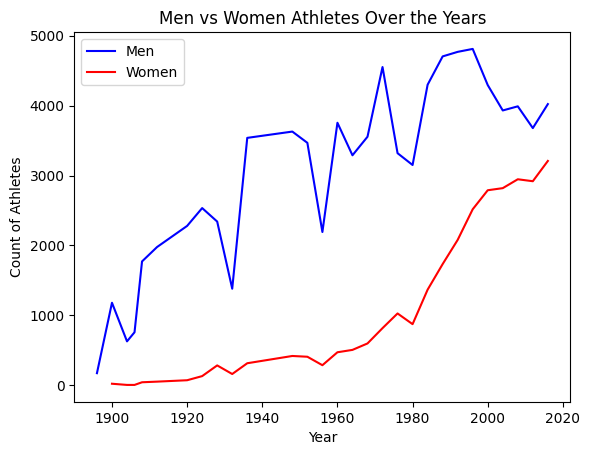

In [82]:
plt.plot(men['Year'], men['Count'], marker='', linestyle='-', color='b', label='Men')
plt.plot(Women['Year'], Women['Count'], marker='', linestyle='-', color='r', label='Women')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count of Athletes')
plt.title('Men vs Women Athletes Over the Years')

# Display the legend
plt.legend()

# Show the plot
plt.show()